# **ML project | Pre-excisting models training and testing**

## **Overview**

This notebook is meant for -

**1) Familiarising with potential models that would be good candidates for doing transfer learning on the dataset**

**2) Testing pre-excisting ML models for weeds (and potentially crop) detection.** 


# **Research***

# **`Background`**

**Business goals:**

* Locate where the weeds are in the fields;
* Estimate the amount of weeds (per unit area);
* Estimate the amount of crop plants (per unit area).

# **`Pretrained models`**


Perspective mode architectures to test ->

1. https://medium.com/@awangenh/mapping-weeds-and-crops-in-precision-agriculture-with-convolutional-neural-networks-138dab87ba00 (Git -> https://github.com/awangenh/Weed-Mapping) 

  **Short overview:** done on the basis of sugarcane plants and weeds in Brazil - it is not very useful from the perspective of out-of-the-box usage, but ... from the perspective of utilizing some of the CNN models they used (transfer learning).

2. https://github.com/matterport/Mask_RCNN#:~:text=coco/coco.py.-,Training%20on%20Your%20Own%20Dataset,-Start%20by%20reading 

  **Short overview:** instructions how to use the Mask RCNN state-of-the-art segmentation ML model for training for your own data.

3. https://youtu.be/hHAdAtCEADg?t=1126

  **Short overview:** Not a codebase but a method for utilizing artificial data for crop and weed detection using background images (usually from the real environment) and foreground images (usually transformed and normalized images out of context).



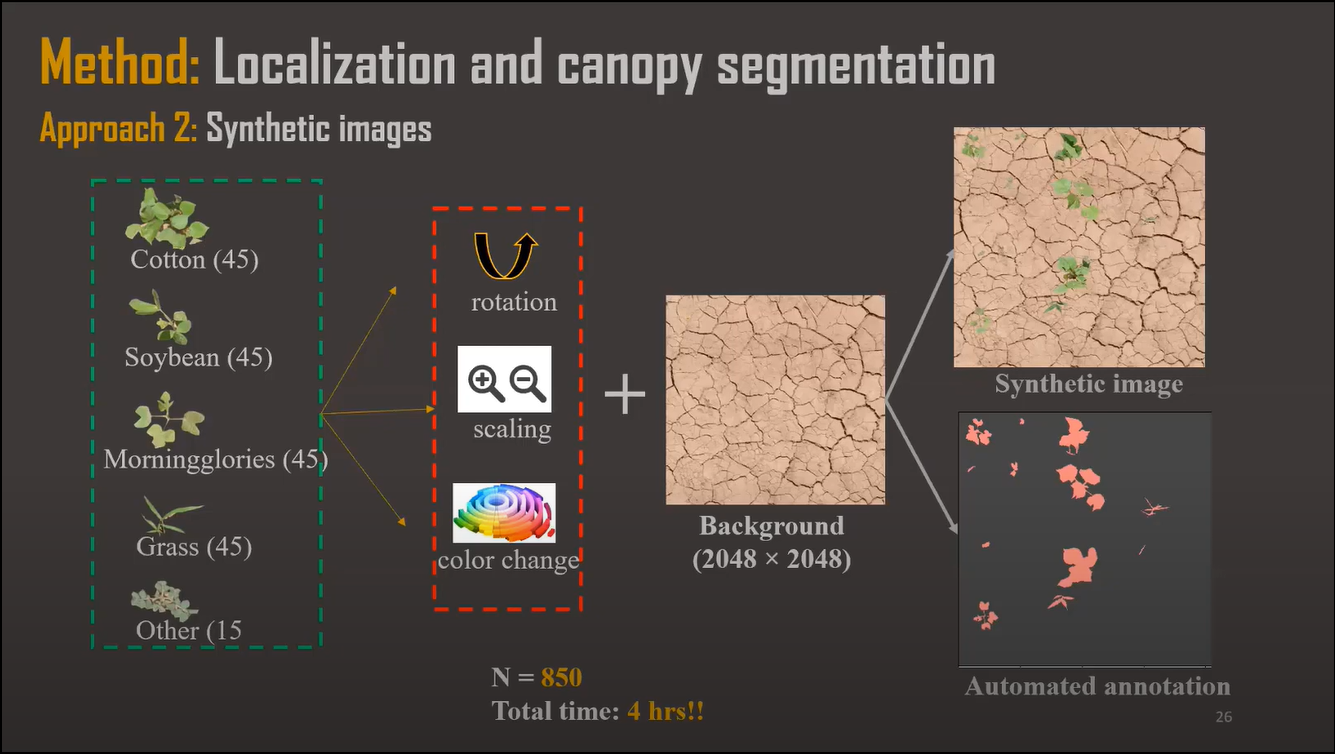

4. https://scholarspace.manoa.hawaii.edu/bitstream/10125/70721/0088.pdf

  **Short overview:** EfficientNet-B1 based weed detetion. Dataset had high resolution ground images as a reference.

5. https://github.com/AlexOlsen/DeepWeeds

  **Short overview:** Based on the article *DeepWeeds: A Multiclass Weed Species Image Dataset for Deep Learning*. Large quantity of labelled data of eight different weed species native to Australia in situ with neighbouring flora. Resnet50 achieved and accuracy of 95.7%.

6. https://american-cse.org/sites/csci2020proc/pdfs/CSCI2020-6SccvdzjqC7bKupZxFmCoA/762400a485/762400a485.pdf

  **Short overview:** very interesting and highly correlating article of detecting weeds from aerial images. Based of image segmentation using MASK R-CNN.  



# **00. Data preparation**

# **`Overview`**

**Goal**: <font color='red'>dataset collection and allocation preparation.</font>

We will create two folders - 
* train;
* labels.

The entire dataset will be split between these folders after proceeding through the data augmentation and preprocessing phases.

In [ ]:
import os, shutil

In [ ]:
# Create folder for data ->
main_path = "/content/data"

if not os.path.exists(main_path):
    os.mkdir(main_path)

# Create train, validationa and test directories ->

train_dir = os.path.join(main_path,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

labels_dir = os.path.join(main_path,'labels')
if not os.path.exists(labels_dir):
    os.mkdir(labels_dir)

In [ ]:
# Mount the drive in shell ->
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data from project directory ->
%cd /content/drive/My Drive/Colab Notebooks/Machine learning project/Processed data

/content/drive/My Drive/Colab Notebooks/Machine learning project/Processed data


In [ ]:
!ls

mexg.zip  new_matched_img_out_multiband_rotated.zip  out_dirt_batch_new.zip


In [ ]:
# Unzip and move the processed data to the data directory ->
path_to_directory = "/content/data"

mexg_dir = os.path.join(path_to_directory,'mexg')
if not os.path.exists(mexg_dir):
  !unzip mexg.zip -d $path_to_directory

dirt_dir = os.path.join(path_to_directory,'out_dirt_batch_new')
if not os.path.exists(dirt_dir):
  !unzip out_dirt_batch_new.zip -d $path_to_directory

tiff_dir = os.path.join(path_to_directory,'new_matched_img_out_multiband_rotated')
if not os.path.exists(tiff_dir):
  !unzip new_matched_img_out_multiband_rotated.zip -d $path_to_directory

Archive:  mexg.zip
   creating: /content/data/mexg/
   creating: /content/data/mexg/2021-05-31/
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW033_N150_1_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW033_N150_2_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW033_N75_1_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW033_N75_2_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW058_N150_1_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW058_N150_2_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW058_N75_1_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW058_N75_2_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW063_N150_1_drone_rot.jpg  
  inflating: /content/data/mexg/2021-05-31/mexg_2021-05-31_NW063_N150_2_drone_rot.jpg  
  inflating: /content/data/m

# **01. Data augmentation**

# **`Overview`**

**Goal**: <font color='red'>dataset transformations and enhancement</font>

We will create additional data by using various data transformations that are suitable for our business case.

In [ ]:
# Lets view some images ->

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Gdal package imports
from osgeo import gdal

/content/data/mexg/2021-05-31


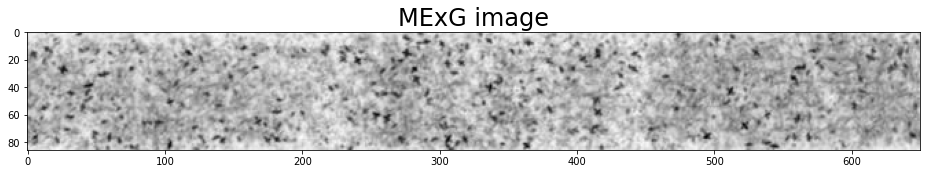

In [ ]:
# MExG vegetation index data ->

%cd /content/data/mexg/2021-05-31/
mexg_image = "mexg_2021-05-31_NW033_N150_1_drone_rot.jpg"

mexg_image = cv.imread(mexg_image, 0)
mexg_image = cv.cvtColor(mexg_image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(16,16))
plt.title("MExG image", fontsize=24)
plt.imshow(mexg_image)
plt.show()

/content/data/out_dirt_batch_new/2021-05-31


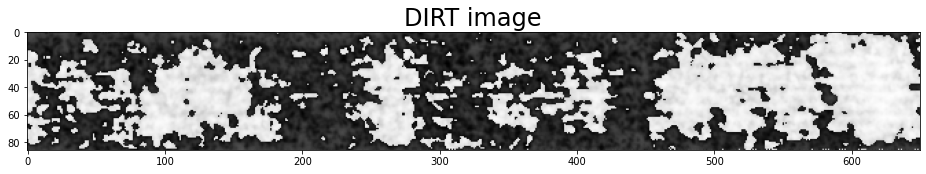

In [ ]:
# DIRT vegetation index data ->

%cd /content/data/out_dirt_batch_new/2021-05-31/
dirt_image = "2021-05-31_NW033_N150_1_drone_rot_DIRT.png"

dirt_image = cv.imread(dirt_image, 0)
dirt_image = cv.cvtColor(dirt_image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(16,16))
plt.title("DIRT image", fontsize=24)
plt.imshow(dirt_image)
plt.show()

/content/data/new_matched_img_out_multiband_rotated/2021-05-31/drone_rot


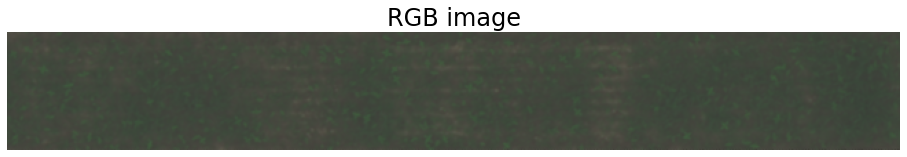

In [ ]:
# RGB image data ->

%cd /content/data/new_matched_img_out_multiband_rotated/2021-05-31/drone_rot/
tiff_image = r"2021-05-31_NW033_N150_1_drone_rot.tif"

tiff_image = gdal.Open(tiff_image)
#print(tiff_image.RasterCount)

band1 = tiff_image.GetRasterBand(1) # Red channel
band2 = tiff_image.GetRasterBand(2) # Green channel
band3 = tiff_image.GetRasterBand(3) # Blue channel
band4 = tiff_image.GetRasterBand(4) 
band5 = tiff_image.GetRasterBand(5) 

b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()

rgb_image = np.dstack((b1, b2, b3))+0.2

# Showing the merged R-G-B image ->
plt.figure(figsize = (16,16))
plt.axis("off")

plt.imshow(rgb_image)
plt.title("RGB image", fontsize=24)
#plt.savefig('Tiff.png', bbox_inches='tight', pad_inches=0, dpi=600) # dpi is important for better resolution
plt.show()

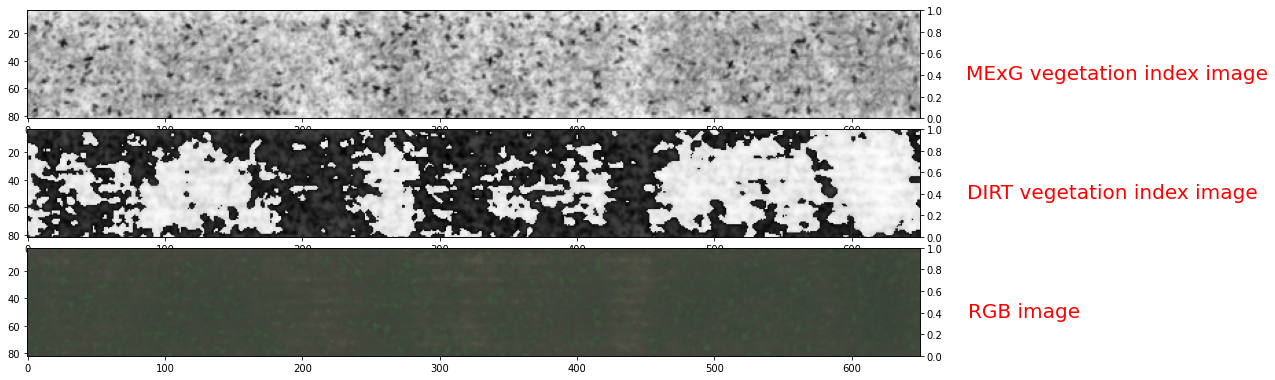

In [ ]:
images = [mexg_image, dirt_image, rgb_image]

n_row = 3
n_col = 1

_, axs = plt.subplots(n_row, n_col, figsize=(16, 16))

plt.subplots_adjust(left=0.125, bottom=0, right=0.9, top=0.3, wspace=0.1, hspace=0.1)

axs = axs.flatten()
i = 0
for image, ax in zip(images, axs):
  ax.twinx() # Turn axis 
  ax.imshow(image)
  if i == 0:
    plt.ylabel("MExG vegetation index image", color="r", rotation = 0, fontsize=20, labelpad=175)
    i += 1
  elif i == 1:
    plt.ylabel("DIRT vegetation index image", color="r", rotation = 0, fontsize=20, labelpad=170)
    i += 1
  elif i == 2:
    plt.ylabel("RGB image", color="r", rotation = 0, fontsize=20, labelpad=82)
plt.show()

In [ ]:
# For sanity checking ->

print(f"MeXG image size: {mexg_image.shape}")
print(f"MeXG image size: {dirt_image.shape}")
print(f"MeXG image size: {rgb_image.shape}")

MeXG image size: (86, 650, 3)
MeXG image size: (86, 650, 3)
MeXG image size: (86, 650, 3)


# **`Automatic labelling (KMeans clustering)`**





In [ ]:
# Define necessary functions ->

def RGB_HEX(color):
  """
  Convert Kmeans RGB values to HEX values ->
  """
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
  #return "#{:02x}{:02x}".format(int(color[0]), int(color[1]))

def color_proportion_values(pct, counted_values):
  """
  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html
  
  Calculating the proportional values for colors present ->
  """
  absolute_values = int(pct/100.*sum(counted_values))
  return "{:.1f}% ({:d} )".format(pct, absolute_values)

def color_pie_chart_plot(predictions, show_image):
  """
  Generating the color_pie_chart_plot ->
  """
  # Aggregating values ->
  value_counts = Counter(predictions)
  cluster_centers = model.cluster_centers_
  # Transforming values ->
  ordered_colors = [cluster_centers[i] for i in value_counts.keys()]
  print(ordered_colors)
  hex_colors = [RGB_HEX(ordered_colors[i]) for i in value_counts.keys()]
  categories = hex_colors
  if show_image == True:
    # Start plotting ->
    fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
    wedges, texts, autotexts= ax.pie(value_counts.values(), autopct=lambda pct: color_proportion_values(pct, value_counts.values()), colors = hex_colors, pctdistance = 1.25)
    ax.legend(wedges, categories, title="RGB Color Class", loc="center left", bbox_to_anchor=(1, 0.25, 0.25, 0.75))
    # Plot values ->
    title = f"RGB colors of {number_of_colors} KMeans Clusters"
    ax.set_title(title, fontsize = 15)
    plt.show()

def clustered_image(filename, save):
  #global clustered_img
  """
  Generating the final clustered image based on the KMeans values ->
  """
  clustered_img = np.zeros((resized_img_array.shape),dtype='uint8')

  cluster_centers = model.cluster_centers_

  for ix in range(clustered_img.shape[0]):
    clustered_img[ix] = cluster_centers[predictions[ix]]
    
  clustered_img = clustered_img.reshape((mexg_image.shape))
  plt.figure(figsize = (16,16))
  plt.imshow(clustered_img)
  if save == True:
    plt.axis("off")
    save_path = "/content/data/labels/" + filename[30:] + ".png"
    plt.savefig(save_path, bbox_inches="tight", pad_inches=0, transparent=True)
  else:
    plt.title('Clustered image', fontsize=24)
    plt.show()

# **`MeXG image clustering`**

In [ ]:
# Reshape the resized image to 2D array and convert the values to float64 ->
resized_img_array = mexg_image.reshape((-1,3))
resized_img_array = np.float64(resized_img_array)

In [ ]:
# Shape of the 2D array ->
print(f"2D array (resized image) shape: {resized_img_array.shape}")

2D array (resized image) shape: (55900, 3)


In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

In [ ]:
# Model training ->
number_of_colors = 3

model = KMeans(n_clusters = number_of_colors, verbose=1, n_init = 25, max_iter = 500)
predictions = model.fit_predict(resized_img_array)
%time

Initialization complete
Iteration 0, inertia 43741560.0
Iteration 1, inertia 39063576.1842345
Iteration 2, inertia 38663327.72927738
Iteration 3, inertia 38521570.591679655
Iteration 4, inertia 38462538.08716375
Iteration 5, inertia 38423147.38512445
Iteration 6, inertia 38394336.6790667
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 65766516.0
Iteration 1, inertia 43709300.46099819
Iteration 2, inertia 41263004.217531435
Iteration 3, inertia 40445692.8281556
Iteration 4, inertia 39835498.47709076
Iteration 5, inertia 39417137.19009668
Iteration 6, inertia 39197127.22296946
Iteration 7, inertia 38995524.73614149
Iteration 8, inertia 38889573.94702962
Iteration 9, inertia 38720330.668617494
Iteration 10, inertia 38646878.85182474
Iteration 11, inertia 38593109.5741515
Iteration 12, inertia 38473056.171987765
Iteration 13, inertia 38439254.35986224
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 49083

[array([205.59915594, 205.59915594, 205.59915594]), array([110.54508415, 110.54508415, 110.54508415]), array([165.21961414, 165.21961414, 165.21961414])]


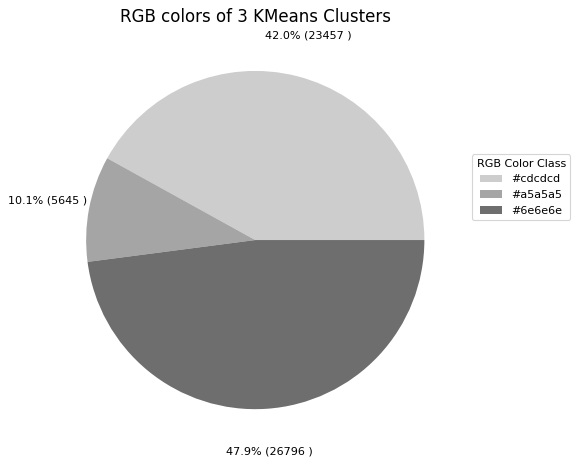

In [ ]:
# Draw the pie chart plot ->
color_pie_chart_plot(predictions, show_image=True)

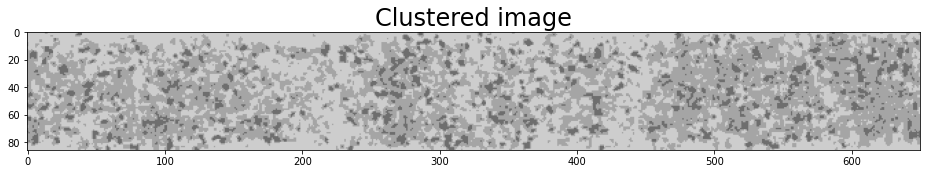

In [ ]:
# Draw the clustered image ->
mexg_clustered = clustered_image(filename=None, save=False)

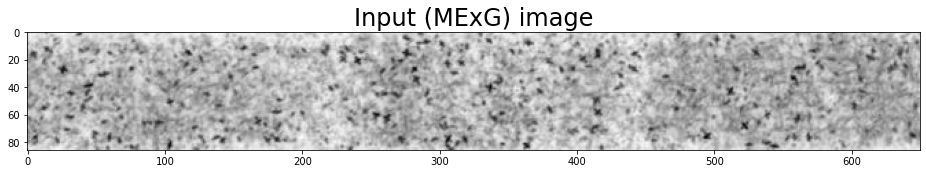

In [ ]:
plt.figure(figsize=(16,16))
plt.title("Input (MExG) image", fontsize=24)
plt.imshow(mexg_image)
plt.show()

# **`DIRT image clustering`**

In [ ]:
# Reshape the resized image to 2D array and convert the values to float64 ->
resized_img_array = dirt_image.reshape((-1,3))
resized_img_array = np.float64(resized_img_array)

In [ ]:
# Shape of the 2D array ->
print(f"2D array (resized image) shape: {resized_img_array.shape}")

2D array (resized image) shape: (55900, 3)


In [ ]:
# Model training ->
number_of_colors = 3

model = KMeans(n_clusters = number_of_colors, verbose=1, n_init = 25, max_iter = 500)
predictions = model.fit_predict(resized_img_array)
%time

Initialization complete
Iteration 0, inertia 15451464.0
Iteration 1, inertia 11310268.37394002
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 14494260.0
Iteration 1, inertia 11624350.199628655
Iteration 2, inertia 11404494.495629895
Iteration 3, inertia 11339227.386266284
Iteration 4, inertia 11310268.37394002
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 22969044.0
Iteration 1, inertia 12041792.55949064
Iteration 2, inertia 11598103.619938847
Iteration 3, inertia 11401089.711545078
Iteration 4, inertia 11337278.062241003
Iteration 5, inertia 11308513.966636911
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 17278881.0
Iteration 1, inertia 11871959.829568194
Iteration 2, inertia 11494151.840603538
Iteration 3, inertia 11337278.062241003
Iteration 4, inertia 11308513.966636911
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0

[array([48.00986842, 48.00986842, 48.00986842]), array([25.0157301, 25.0157301, 25.0157301]), array([231.47103212, 231.47103212, 231.47103212])]


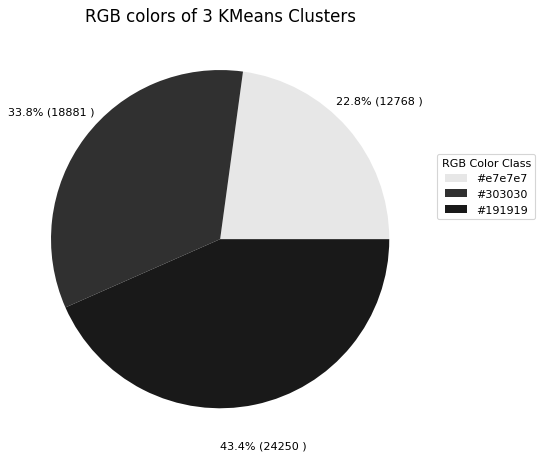

In [ ]:
# Draw the pie chart plot ->
color_pie_chart_plot(predictions, show_image=True)

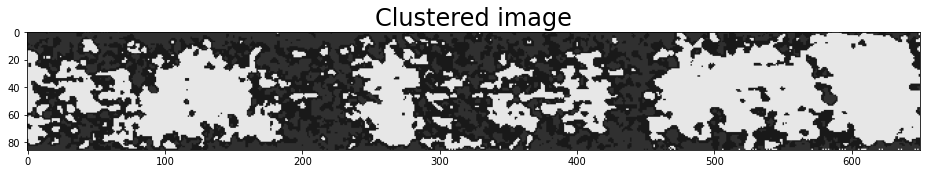

In [ ]:
# Draw the clustered image ->
dirt_clustered = clustered_image(filename=None, save=False)

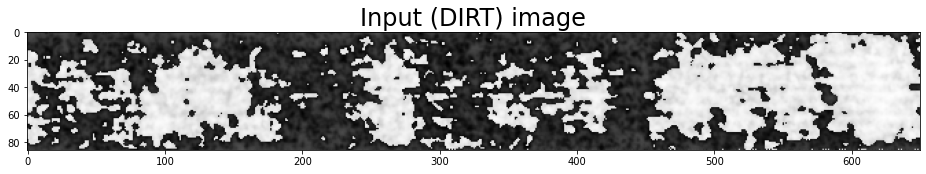

In [ ]:
plt.figure(figsize=(16,16))
plt.title("Input (DIRT) image", fontsize=24)
plt.imshow(dirt_image)
plt.show()

# **`Processing and allocating train (RGB) and labels data (MeXG index)`**

In [ ]:
# RGB image data ->

def TIF2RGB(filename):

  # Open file ->
  tiff_image = gdal.Open(filename, gdal.GA_ReadOnly)
  #print(tiff_image.RasterCount)
  
  # Get channels ->
  band1 = tiff_image.GetRasterBand(1) # Red channel
  band2 = tiff_image.GetRasterBand(2) # Green channel
  band3 = tiff_image.GetRasterBand(3) # Blue channel

  # Convert channels into arrays ->
  b1 = band1.ReadAsArray()
  b2 = band2.ReadAsArray()
  b3 = band3.ReadAsArray()

  # Stack the arrays to create R-G-B image ->
  rgb_image = np.dstack((b1, b2, b3))+0.2

  # Showing the merged R-G-B image ->
  plt.figure(figsize = (16,16))
  plt.axis("off")

  plt.imshow(rgb_image)
  #plt.title(f"RGB image {filename[73:]}", fontsize=24)

  save_path = "/content/data/train/" + filename[73:] + ".png"
  plt.savefig(save_path, bbox_inches="tight", pad_inches=0, transparent=True) 
  plt.show()

In [ ]:
# Recursively get image files from subdirectories and allocate them into train folder ->
import glob 

root_dir = "/content/data/new_matched_img_out_multiband_rotated/"

# get only files from subdirectories that have .tif ->
for filename in glob.iglob(root_dir + '**/*.tif', recursive=True):
  print(filename)
  TIF2RGB(filename)

In [ ]:
def MEXG2CLUSTERED(filename, save):
  """
  For clustering and assigning RGB classes to MeXG index images
  """
  mexg_image = cv.imread(filename, 0)
  mexg_image = cv.cvtColor(mexg_image, cv.COLOR_BGR2RGB)
  # Reshape the resized image to 2D array and convert the values to float64 ->
  resized_img_array = mexg_image.reshape((-1,3))
  resized_img_array = np.float64(resized_img_array)

  # Model training ->
  number_of_colors = 3

  model = KMeans(n_clusters = number_of_colors, verbose=0, n_init = 25, max_iter = 500)
  predictions = model.fit_predict(resized_img_array)

  """
  Generating the final clustered image based on the KMeans values ->
  """
  clustered_img = np.zeros((resized_img_array.shape),dtype='uint8')

  cluster_centers = model.cluster_centers_

  for ix in range(clustered_img.shape[0]):
    clustered_img[ix] = cluster_centers[predictions[ix]]
    
  clustered_img = clustered_img.reshape((mexg_image.shape))

  # Create 3 classes based on clusters ->

  # Get rgb colors ->
  axis=2
  a = np.unique(
        clustered_img.view(np.dtype((np.void, clustered_img.dtype.itemsize*clustered_img.shape[axis])))
        ).view(clustered_img.dtype).reshape(-1, clustered_img.shape[axis])

  #print(a)
  bottom_value = a[0][0]
  top_value = a[len(a)-1][0]
  average = int((top_value-bottom_value)/2) # nr of clusters-1

  """
  #<--------------------------------------------------------------------------->
  
  # Lower and Upper limits for green
  green_low_thresh = np.array([bottom_value, 0, 0])
  green_high_thresh = np.array([int(bottom_value+average/2), 255, 255])

  # Mask
  mask_green = cv.inRange(clustered_img, green_low_thresh, green_high_thresh)

  # Use mask to change image green (where we found green)
  clustered_img[mask_green > 0] = (0, 255, 0)

  #<--------------------------------------------------------------------------->

  # Lower and Upper limits for blue
  blue_low_thresh = np.array([int(bottom_value+average/2), 0, 0])
  blue_high_thresh = np.array([int(bottom_value+average+average/2), 255, 255])

  # Mask 
  mask_blue = cv.inRange(clustered_img, blue_low_thresh, blue_high_thresh)

  # Use mask to change image blue 
  clustered_img[mask_blue > 0] = (0, 0, 255)

  #<--------------------------------------------------------------------------->
  
  # Lower and Upper limits for red
  red_low_thresh = np.array([int(bottom_value+average+average/2),0,0])
  red_high_thresh = np.array([top_value,255,255])

  # Mask 
  mask_red = cv.inRange(clustered_img, red_low_thresh, red_high_thresh)

  # Change image to red 
  clustered_img[mask_red > 0] = (255, 0, 0)

   #<--------------------------------------------------------------------------->
  """
  # Lower and Upper limits for green
  green_low_thresh = np.array([a[0][0], 0, 0])
  green_high_thresh = np.array([a[0][0], 255, 255])

  # Mask
  mask_green = cv.inRange(clustered_img, green_low_thresh, green_high_thresh)

  # Use mask to change image green 
  clustered_img[mask_green > 0] = (0, 255, 0)

  # Lower and Upper limits for blue
  blue_low_thresh = np.array([a[1][0], 0, 0])
  blue_high_thresh = np.array([a[1][0], 255, 255])

  # Mask 
  mask_blue = cv.inRange(clustered_img, blue_low_thresh, blue_high_thresh)

  # Use mask to change image blue 
  clustered_img[mask_blue > 0] = (0, 0, 255)

  # Lower and Upper limits for red
  red_low_thresh = np.array([a[2][0],0,0])
  red_high_thresh = np.array([a[2][0],255,255])

  # Mask 
  mask_red = cv.inRange(clustered_img, red_low_thresh, red_high_thresh)

  # Change image to red 
  clustered_img[mask_red > 0] = (255, 0, 0)

  # Get RGB colors
  axis=2
  a = np.unique(
        clustered_img.view(np.dtype((np.void, clustered_img.dtype.itemsize*clustered_img.shape[axis])))
        ).view(clustered_img.dtype).reshape(-1, clustered_img.shape[axis])

  # Sanity check ->
  #print(len(a))
  if len(a) == 3: # 3 color classes
    assert True
  else:
    assert False, "Houston we've got a problem"

  if save == True:
    #plt.axis("off")
    save_path = "/content/data/labels/" + filename[30:] + ".png"
    plt.imsave(save_path, clustered_img, format = "png")
    #plt.savefig(save_path, bbox_inches="tight", pad_inches=0, transparent=True)
  elif save == False:
    plt.figure(figsize = (16,16))
    plt.imshow(clustered_img)
    plt.title('Clustered image', fontsize=24)
    plt.show()

In [ ]:
MEXG2CLUSTERED("/content/data/mexg/2021-05-31/mexg_2021-05-31_NW033_N150_1_drone_rot.jpg", save = True)

In [ ]:
MEXG2CLUSTERED("/content/data/mexg/2021-07-05/mexg_2021-07-05_NW121_N150_2_drone_rot.jpg", save = True)

In [ ]:
MEXG2CLUSTERED("/content/data/mexg/2021-07-19/mexg_2021-07-19_NW033_N150_2_drone_rot.jpg", save = True)

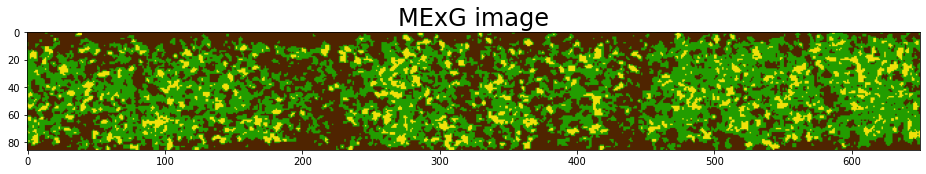

In [ ]:
mexg_image = "/content/data/labels/mexg_2021-05-31_NW033_N150_1_drone_rot.jpg.png"

mexg_image = cv.imread(mexg_image)

# Lower and Upper limits for red
green_low_thresh = np.array([255, 0, 0])
green_high_thresh = np.array([255, 0, 0])

# Mask
mask_green = cv.inRange(mexg_image, green_low_thresh, green_high_thresh)

# Use mask to change image red (where we found red)
mexg_image[mask_green > 0] = (34, 157, 0)



# Lower and Upper limits for blue
blue_low_thresh = np.array([0, 255, 0])
blue_high_thresh = np.array([0, 255, 0])

# Mask 
mask_blue = cv.inRange(mexg_image, blue_low_thresh, blue_high_thresh)

# Use mask to change image blue 
mexg_image[mask_blue > 0] = (240, 225, 10)

# Lower and Upper limits for red
red_low_thresh = np.array([0,0,255])
red_high_thresh = np.array([0,0,255])

# Mask 
mask_red = cv.inRange(mexg_image, red_low_thresh, red_high_thresh)

# Change image to red 
mexg_image[mask_red > 0] = (79, 36, 0)

"""
axis=2
a = np.unique(
      mexg_image.view(np.dtype((np.void, mexg_image.dtype.itemsize*mexg_image.shape[axis])))
      ).view(mexg_image.dtype).reshape(-1, mexg_image.shape[axis])

print(a)
"""

plt.figure(figsize=(16,16))
plt.title("MExG image", fontsize=24)
plt.imshow(mexg_image)
plt.show()

In [ ]:
# Recursively get image files from subdirectories and allocate them into lables folder ->
import glob 

root_dir = "/content/data/mexg/"

# get only files from subdirectories that have .jpg ->
for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
     #shutil.move(filename, "/content/data/labels") 
     print(filename)
     MEXG2CLUSTERED(filename, save = True)

/content/data/mexg/2021-07-05/mexg_2021-07-05_NW063_N75_1_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW167_N75_1_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW158_N150_2_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW137_N75_1_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW105_N75_1_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW137_N75_2_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW079_N150_1_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW063_N75_2_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW121_N75_1_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW105_N75_2_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW134_N150_2_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW265_N75_1_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW105_N150_2_drone_rot.jpg
/content/data/mexg/2021-07-05/mexg_2021-07-05_NW137_N150_2_d

In [ ]:
labels_path = "/content/data/labels"

for label_image in os.listdir(labels_path):
  label_image_path = os.path.join(labels_path, label_image)
  image_array = cv.imread(label_image_path)
  
  plt.axis("off")
  plt.figure(figsize = (16,16))
  plt.imshow(image_array)
  plt.show()

# **03. Model training**

# **`Overview`**

**Goal**: <font color='red'>different models training and testing</font>

We will train and optimize different models to select the best one for our **business case**. Entire training process is based on transfer learning, because of the amount of data accessible. 

In [ ]:
*# Assign train and labels ->

# Train and labels path ->
train_path = "/content/data/train"
labels_path = "/content/data/labels"

# Initiate query datastructures for images ->
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

# Add images from path to X_train and y_train ->
for train_image in os.listdir(train_path):
        train_image_path = os.path.join(train_path, train_image)
        image_array = cv.imread(train_image_path)
        X_train.append(image_array)

for label_image in os.listdir(labels_path):
        label_image_path = os.path.join(labels_path, label_image)
        image_array = cv.imread(label_image_path)
        y_train.append(image_array)

print(f"Number of training images: {len(X_train)}")
print(f"Number of labeled i.e segmented images: {len(y_train)}")

Number of training images: 640
Number of labeled i.e segmented images: 640


In [ ]:
# Train, test and validation split ->

"""
X_train, X_test, y_train, y_test 
    = train_test_split(X, y, test_size=0.2, random_state=1)

 X_train, X_val, y_train, y_val 
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
"""

"""
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

"""

In [ ]:
# Data augmentation ->

"""
from keras.preprocessing.image import ImageDataGenerator

# Create your own data augmentation pipeline:
datagen = ImageDataGenerator(rotation_range=90, # randomly rotate an image from 0 to 90 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True, # horizontaly flip random 30% of images  
                 fill_mode='nearest', # How the pixels are filled in (1. transformation)
                 shear_range = 0.3) # Shear rotation range (2. transformation)

# Assign augmentation pipeline to our data
datagen.fit(X_train)
"""

## **U-Net segmentation**

**Reference:**

* https://www.tensorflow.org/tutorials/images/segmentation



In [ ]:
# General imports ->
import tensorflow as tf

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
# Training and labels data normalization ->
# Normalize color values to range [0,1]

def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [ ]:
# Resizing and normalizing images ->

def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
TRAIN_LENGTH = len(X_train)
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

In [ ]:
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
for images, masks in train_batches.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False


In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
show_predictions()

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [ ]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_batches, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_batches,
                          callbacks=[DisplayCallback()])

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
show_predictions(test_batches, 3)

## **Mask-RCNN segmentation**

**Reference:**

* https://engineering.matterport.com/splash-of-color-instance-segmentation-with-mask-r-cnn-and-tensorflow-7c761e238b46
* https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon

In [ ]:
# General imports ->
import os 
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob
from sklearn.model_selection import KFold
 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('Mask_RCNN')

# **04. Results**



**Information about images:**

* Locate where the weeds are in the fields;
* Estimate the amount of weeds (per unit area);
* Estimate the amount of crop plants (per unit area).

# **`Weed location`**

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def plot_weed_location(image):
  """
  Plot weed locations
  """  
  fig, ax = plt.subplots(figsize=(16,16))
  red_patch = mpatches.Patch(color = 'red', label = f'GROUND')
  green_patch = mpatches.Patch(color = 'lime', label = f'WEED')
  blue_patch = mpatches.Patch(color = 'blue', label = f'CROP')

  ax.legend(handles=[red_patch, green_patch, blue_patch], fontsize=10)
  plt.imshow(image)
  plt.title("GROUND, WEED and CROP class locations", fontsize=24)
  plt.axis("off")
  plt.show()

# **`Weed, Crop and Ground estimation (per unit area)`**

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def class_area_estimation(area_plot, proportion_plot):
  """
  Calculate and plot class area and/or proportion estimations
  """
  total_nr_of_pixels = final_image.shape[0]*final_image.shape[1]
  field_area = 2*10 # square meters 

  # 1 pixel size in square meters
  pixel_size = field_area/total_nr_of_pixels
  #print(f"1 pixel size in the image is: {pixel_size} m^2/pixel")

  # Red pixel values ->
  red_pixel_value = [255,0,0]
  red_pixels = np.count_nonzero(np.all(final_image==red_pixel_value, axis=2))
  #print(red_pixels)

  # Green pixel values ->
  green_pixel_value = [0,255,0]
  green_pixels = np.count_nonzero(np.all(final_image==green_pixel_value, axis=2))
  #print(green_pixels)

  # Blues pixel values ->
  blue_pixel_value = [0,0,255]
  blue_pixels = np.count_nonzero(np.all(final_image==blue_pixel_value, axis=2))
  #print(blue_pixels)

  # Sanity check ->
  if total_nr_of_pixels == (red_pixels + green_pixels + blue_pixels):
    assert True
  else:
    assert False, "Houston we've got a problem"

  # Calculate square meters ->
  ground_area = pixel_size*red_pixels
  weed_area = pixel_size*green_pixels
  rop_area = pixel_size*blue_pixels

  # Sanity check ->
  if field_area == (ground_area + weed_area + crop_area):
    assert True
  else:
    assert False, "Houston we've got a problem"

  # plot area estimation plot
  if area_plot == True:
    fig, ax = plt.subplots(figsize=(16,16))
    red_patch = mpatches.Patch(color = 'red', label = f'GROUND {round(ground_area, 1)} m^2')
    green_patch = mpatches.Patch(color = 'lime', label = f'WEED {round(weed_area, 1)} m^2')
    blue_patch = mpatches.Patch(color = 'blue', label = f'CROP {round(crop_area, 1)} m^2')

    ax.legend(handles=[red_patch, green_patch, blue_patch], fontsize=10)
    plt.imshow(final_image)
    plt.title("GROUND, WEED and CROP class in m^2 per area", fontsize=24)
    plt.axis("off")
    plt.show()
  # plot proportion estimation plot
  elif proportion_plot == True:
    fig, ax = plt.subplots(figsize=(16,16))
    red_patch = mpatches.Patch(color = 'red', label = f'GROUND {round(100*ground_area/field_area, 1)} %')
    green_patch = mpatches.Patch(color = 'lime', label = f'WEED {round(100*weed_area/field_area, 1)} %')
    blue_patch = mpatches.Patch(color = 'blue', label = f'CROP {round(100*crop_area/field_area, 1)} %')

    ax.legend(handles=[red_patch, green_patch, blue_patch], fontsize=10)
    plt.imshow(final_image)
    plt.title("GROUND, WEED and CROP class in % per area", fontsize=24)
    plt.axis("off")
    plt.show()